In [65]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 31 14:33:57 2023

@author: Lin
"""

import os
current_path = os.getcwd()
import numpy as np
from numpy import seterr
seterr(all='raise')
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import multiprocess as mp
import sys
sys.path.append(current_path+'/../../')
import myInput
import post_processing
import PACKAGE_MP_3DLinear as linear3d

import importlib
importlib.reload(post_processing)



<module 'post_processing' from '/home/lin.yang/projects/VECTOR/examples/dump_to_init/../../post_processing.py'>

## Read the IC 

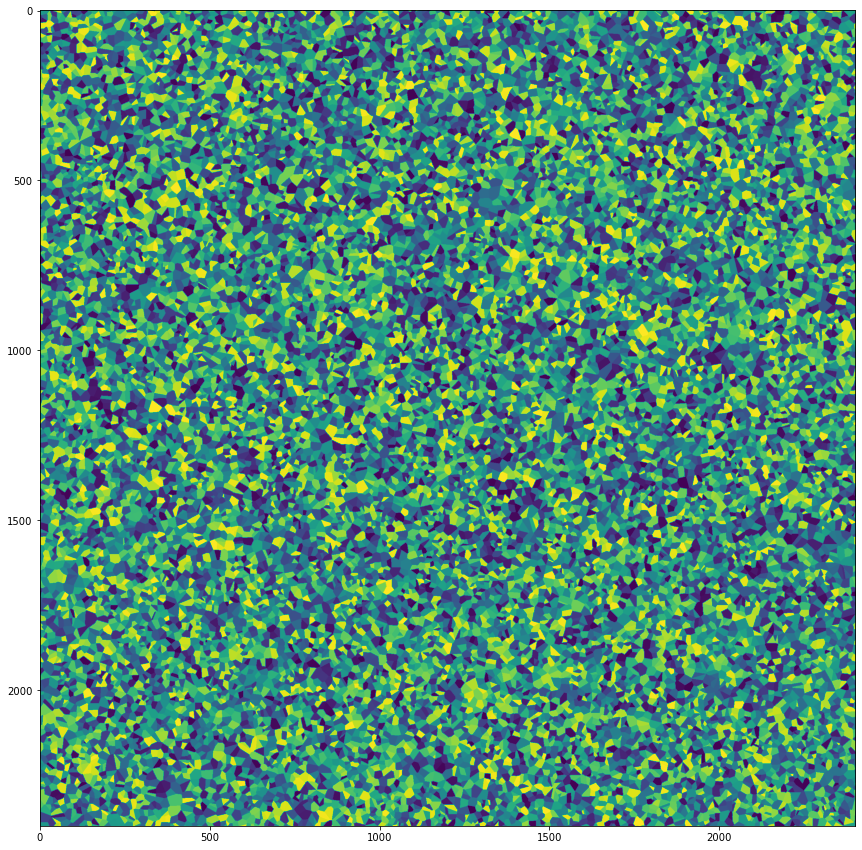

In [66]:


if __name__ == '__main__':


    # File name
    dump_file_foler = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_multiCoreCompare/"
    init_file_folder = dump_file_foler + "IC/"
    init_file_name = f"Case4.init"
    init_file_name_update = f"Case4_bimodal.init"
    init_file_name_final = f"Case4_bimodal_neighbors5.init"

    # Read init file
    grain_num = 20000
    size_x, size_y = 2400, 2400
    box_size = np.array([size_x,size_y,1])
    init_img = post_processing.init2img(box_size,init_file_folder+init_file_name)
    init_img.astype(int)
    
    init2EAarray = post_processing.init2EAarray(init_file_folder+init_file_name,grain_num)
    
    plt.figure(figsize=(15,15))
    plt.imshow(init_img)

    

## Update the IC 

In [102]:
    # expected large grains 1-500,500,r=100 2-500,2000,r=100 3-1000,1500,r=100 4-1500,500,r=100 5-2000,2000,r=100  
    # large_grain_location = np.array([[500,500], [500,2000], [1000,1500], [1500,500], [2000,2000], [2000,1000], 
    #                                  [1000,800], [400,1100], [1200,1800], [1800,1600]])
    large_grain_location = np.random.randint(size_x,size=(100,2))
    large_grain_radius = 50*np.ones(len(large_grain_location))
    init_img_updated = init_img.copy()
    small_grains_in_large = [[] for i in range(len(large_grain_location))]
    for i in tqdm(range(size_x)):
        for j in range(size_y):
            in_large_grains = np.linalg.norm(large_grain_location-[i,j], axis=1) < large_grain_radius
            if np.sum(in_large_grains) == 0: continue
            large_grain_index = np.where(in_large_grains)[0][0]
            small_grains_in_large[large_grain_index].append(init_img[i,j])
            
    for i in range(len(small_grains_in_large)): 
        unique_id = 0
        # unique each small grains list
        small_grains_in_large[i] = np.unique(small_grains_in_large[i])
        # assign the first grain in list for each small grain
        for j in range(len(small_grains_in_large[i])):
            if unique_id == 0: unique_id = np.random.randint(len(small_grains_in_large[i]))
            init_img_updated[init_img_updated==small_grains_in_large[i][j]] = small_grains_in_large[i][unique_id]
    
    # visualize microstructure
    plt.figure(figsize=(15,15))
    plt.imshow(init_img_updated)

100%|██████████| 2400/2400 [01:40<00:00, 23.92it/s]


(-0.5, 15.0)

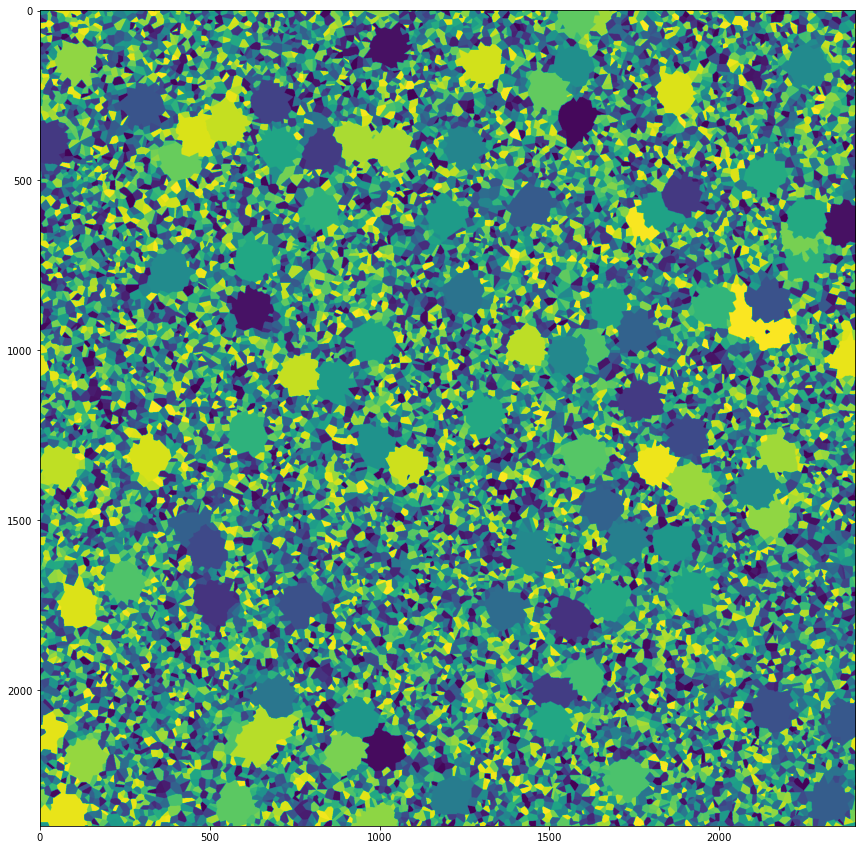

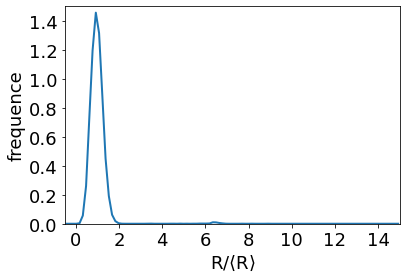

In [103]:
    
    # grain size distribution
    grain_id_list = np.unique(init_img_updated)
    grain_area_list = np.zeros(len(grain_id_list))
    for k in range(len(grain_id_list)): grain_area_list[k] = np.sum(init_img_updated==grain_id_list[k])
    grain_size_list = (grain_area_list/np.pi)**0.5
    grain_size_ave = np.sum(grain_size_list)/len(grain_size_list)
    grain_size_list_norm = grain_size_list/grain_size_ave
    xLim = [-0.5, 10.0]
    binValue = 0.15
    binNum = round((abs(xLim[0])+abs(xLim[1]))/binValue)
    xCor = np.linspace((xLim[0]+binValue/2),(xLim[1]-binValue/2),binNum)
    freqArray = np.zeros(binNum)
    for k in range(len(grain_size_list_norm)):
        freqArray[int((grain_size_list_norm[k]-xLim[0])/binValue)] += 1
    freqArray = freqArray / sum(freqArray*binValue)
    plt.figure()
    plt.plot(xCor,freqArray, linewidth=2)
    plt.xlabel(r"R/$\langle$R$\rangle$", fontsize=18)
    plt.ylabel("frequence", fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim([0,1.5])
    plt.xlim(xLim)
    

In [104]:
freqArray

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.61903613e-03, 5.62961176e-02, 2.60570601e-01, 7.32251644e-01,
       1.19508615e+00, 1.45605887e+00, 1.31531858e+00, 8.84251161e-01,
       4.49564710e-01, 1.91406800e-01, 6.19257293e-02, 1.80951807e-02,
       3.61903613e-03, 4.02115126e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.02115126e-04, 8.04230251e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.02115126e-04, 4.02115126e-04, 0.00000000e+00, 8.04230251e-04,
       0.00000000e+00, 4.02115126e-04, 0.00000000e+00, 4.02115126e-04,
       4.02115126e-04, 1.20634538e-03, 1.20634538e-03, 1.20634538e-03,
       2.01057563e-03, 1.00528781e-02, 9.24864789e-03, 5.22749663e-03,
       2.41269075e-03, 4.02115126e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.02115126e-04, 0.00000000e+00,
      

## Save IC

In [105]:
    # Write IC
    post_processing.image2init(init_img_updated, init2EAarray, init_file_folder+init_file_name_update)
    
    # Write IC with neighbors
    interval = 5
    neighbor_file_done = post_processing.output_init_neighbor_from_init_mp(interval, box_size, init_file_folder+init_file_name_update, init_file_folder+init_file_name_final)
    
    print(f"The neighbor init file are finished? {neighbor_file_done}")
    
    
    

100%|██████████| 2400/2400 [00:14<00:00, 164.89it/s]


NEW IC WRITTEN TO FILE: /blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_multiCoreCompare/IC/Case4_bimodal.init
> img matrix start.
> img matrix end
> Sites start writing


100%|██████████| 1/1 [00:09<00:00,  9.28s/it]

> Sites end writing
> Neighbors start writing



 95%|█████████▍| 18/19 [00:06<00:00,  2.95it/s]

The max length of neighbor data line is 1182


 94%|█████████▍| 17/18 [00:05<00:00,  2.90it/s]

The max length of neighbor data line is 1117

 89%|████████▉ | 17/19 [00:05<00:00,  2.99it/s]

 74%|███████▎  | 14/19 [00:05<00:01,  2.76it/s]

The max length of neighbor data line is 1182

 84%|████████▍ | 16/19 [00:05<00:01,  2.74it/s]

100%|██████████| 18/18 [00:06<00:00,  2.91it/s]


The max length of neighbor data line is 1182


100%|██████████| 18/18 [00:06<00:00,  2.94it/s]


The max length of neighbor data line is 1182


100%|██████████| 18/18 [00:06<00:00,  2.93it/s]


The max length of neighbor data line is 1182

 79%|███████▉  | 15/19 [00:05<00:01,  2.74it/s]


The max length of neighbor data line is 1351


 95%|█████████▍| 18/19 [00:06<00:00,  2.80it/s]

The max length of neighbor data line is 1351

 79%|███████▉  | 15/19 [00:05<00:01,  2.63it/s]

100%|██████████| 19/19 [00:06<00:00,  2.96it/s]


The max length of neighbor data line is 1182


 72%|███████▏  | 13/18 [00:05<00:01,  2.61it/s]

The max length of neighbor data line is 1182


 84%|████████▍ | 16/19 [00:05<00:01,  2.92it/s]

The max length of neighbor data line is 1182


 89%|████████▉ | 17/19 [00:05<00:00,  2.94it/s]

The max length of neighbor data line is 1182


 89%|████████▉ | 16/18 [00:05<00:00,  2.95it/s]

The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.89it/s]


The max length of neighbor data line is 1182


 89%|████████▉ | 17/19 [00:05<00:00,  2.96it/s]

The max length of neighbor data line is 1182

100%|██████████| 18/18 [00:06<00:00,  2.88it/s]

The max length of neighbor data line is 1351


 84%|████████▍ | 16/19 [00:05<00:01,  2.99it/s]

The max length of neighbor data line is 1182


 79%|███████▉  | 15/19 [00:05<00:01,  2.83it/s]

The max length of neighbor data line is 1351


 83%|████████▎ | 15/18 [00:05<00:01,  2.76it/s]

The max length of neighbor data line is 1182


 89%|████████▉ | 17/19 [00:06<00:00,  2.92it/s]

The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.88it/s]


The max length of neighbor data line is 1182


 78%|███████▊  | 14/18 [00:05<00:01,  2.30it/s]

The max length of neighbor data line is 1182


 84%|████████▍ | 16/19 [00:05<00:01,  2.84it/s]

The max length of neighbor data line is 1351

 94%|█████████▍| 17/18 [00:05<00:00,  2.98it/s]

100%|██████████| 19/19 [00:06<00:00,  2.90it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.90it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.95it/s]

The max length of neighbor data line is 1182

100%|██████████| 19/19 [00:06<00:00,  2.96it/s]

The max length of neighbor data line is 1351

 95%|█████████▍| 18/19 [00:06<00:00,  3.00it/s]


The max length of neighbor data line is 1351

 95%|█████████▍| 18/19 [00:06<00:00,  2.69it/s]

100%|██████████| 19/19 [00:06<00:00,  3.01it/s]

The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.86it/s]

The max length of neighbor data line is 1039

100%|██████████| 19/19 [00:06<00:00,  2.88it/s]


The max length of neighbor data line is 1351
The max length of neighbor data line is 1351


 89%|████████▉ | 17/19 [00:05<00:00,  2.87it/s]

The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.92it/s]

The max length of neighbor data line is 1351

 95%|█████████▍| 18/19 [00:06<00:00,  3.03it/s]

The max length of neighbor data line is 1351

100%|██████████| 19/19 [00:06<00:00,  3.04it/s]

100%|██████████| 18/18 [00:05<00:00,  3.02it/s]


The max length of neighbor data line is 1182

100%|██████████| 19/19 [00:06<00:00,  2.94it/s]


 89%|████████▉ | 17/19 [00:05<00:00,  2.74it/s]

The max length of neighbor data line is 1351The max length of neighbor data line is 1351



 94%|█████████▍| 17/18 [00:06<00:00,  2.69it/s]

The max length of neighbor data line is 1351


100%|██████████| 18/18 [00:06<00:00,  2.84it/s]


The max length of neighbor data line is 1351

 89%|████████▉ | 17/19 [00:05<00:00,  2.89it/s]

100%|██████████| 19/19 [00:06<00:00,  2.90it/s]

The max length of neighbor data line is 1351

 89%|████████▉ | 17/19 [00:05<00:00,  3.07it/s]

 79%|███████▉  | 15/19 [00:05<00:01,  2.81it/s]

The max length of neighbor data line is 1351

 79%|███████▉  | 15/19 [00:06<00:01,  2.84it/s]

 89%|████████▉ | 17/19 [00:06<00:00,  2.81it/s]

The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.78it/s]

The max length of neighbor data line is 1351

 89%|████████▉ | 17/19 [00:05<00:00,  2.88it/s]

The max length of neighbor data line is 1208The max length of neighbor data line is 1351

100%|██████████| 19/19 [00:06<00:00,  2.84it/s]


100%|██████████| 18/18 [00:06<00:00,  2.84it/s]

The max length of neighbor data line is 1351


The max length of neighbor data line is 1351


 89%|████████▉ | 17/19 [00:05<00:00,  2.90it/s]

The max length of neighbor data line is 1351


100%|██████████| 18/18 [00:06<00:00,  2.76it/s]


The max length of neighbor data line is 1351
The max length of neighbor data line is 1351


 79%|███████▉  | 15/19 [00:05<00:01,  2.81it/s]

The max length of neighbor data line is 1351


 95%|█████████▍| 18/19 [00:05<00:00,  3.10it/s]

The max length of neighbor data line is 1351


 83%|████████▎ | 15/18 [00:05<00:01,  2.48it/s]

The max length of neighbor data line is 1182


100%|██████████| 19/19 [00:06<00:00,  2.91it/s]


The max length of neighbor data line is 1351


100%|██████████| 18/18 [00:06<00:00,  3.15it/s]

The max length of neighbor data line is 1351

100%|██████████| 18/18 [00:06<00:00,  2.97it/s]

The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.94it/s]


The max length of neighbor data line is 1351


 74%|███████▎  | 14/19 [00:06<00:01,  2.81it/s]

The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.88it/s]


The max length of neighbor data line is 1351


100%|██████████| 18/18 [00:06<00:00,  2.82it/s]

The max length of neighbor data line is 1351

 95%|█████████▍| 18/19 [00:06<00:00,  3.09it/s]

100%|██████████| 18/18 [00:06<00:00,  2.62it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  3.04it/s]


The max length of neighbor data line is 1351
The max length of neighbor data line is 1351


 89%|████████▉ | 17/19 [00:06<00:00,  2.96it/s]

The max length of neighbor data line is 1351


 95%|█████████▍| 18/19 [00:06<00:00,  3.24it/s]

The max length of neighbor data line is 1351
The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.73it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.81it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.89it/s]


The max length of neighbor data line is 1351


 95%|█████████▍| 18/19 [00:06<00:00,  3.16it/s]

The max length of neighbor data line is 1351


 84%|████████▍ | 16/19 [00:06<00:01,  2.92it/s]

The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.82it/s]

The max length of neighbor data line is 1351


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.97it/s]

The max length of neighbor data line is 1351

100%|██████████| 19/19 [00:06<00:00,  2.85it/s]

The max length of neighbor data line is 1351

 95%|█████████▍| 18/19 [00:06<00:00,  3.01it/s]

100%|██████████| 18/18 [00:06<00:00,  3.03it/s]

The max length of neighbor data line is 1351


100%|██████████| 18/18 [00:06<00:00,  2.86it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  3.05it/s]


The max length of neighbor data line is 1351


 89%|████████▉ | 17/19 [00:06<00:00,  2.96it/s]

The max length of neighbor data line is 1351


 95%|█████████▍| 18/19 [00:06<00:00,  3.20it/s]

The max length of neighbor data line is 1351


 74%|███████▎  | 14/19 [00:07<00:01,  2.82it/s]

The max length of neighbor data line is 1351


 95%|█████████▍| 18/19 [00:06<00:00,  3.00it/s]

The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.83it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.97it/s]

The max length of neighbor data line is 1351


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.96it/s]


The max length of neighbor data line is 1351


 95%|█████████▍| 18/19 [00:06<00:00,  3.13it/s]

The max length of neighbor data line is 1351

100%|██████████| 19/19 [00:06<00:00,  3.14it/s]

 95%|█████████▍| 18/19 [00:06<00:00,  3.13it/s]

The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.93it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.90it/s]


The max length of neighbor data line is 1351
The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.88it/s]


The max length of neighbor data line is 1351

 95%|█████████▍| 18/19 [00:06<00:00,  3.18it/s]

100%|██████████| 19/19 [00:06<00:00,  2.94it/s]


The max length of neighbor data line is 1351

100%|██████████| 19/19 [00:06<00:00,  2.95it/s]

The max length of neighbor data line is 1351
The max length of neighbor data line is 1351


 95%|█████████▍| 18/19 [00:06<00:00,  3.10it/s]

The max length of neighbor data line is 1351


100%|██████████| 18/18 [00:06<00:00,  2.79it/s]

The max length of neighbor data line is 1351


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.95it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.96it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.98it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:07<00:00,  2.54it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.92it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.85it/s]


The max length of neighbor data line is 1351
The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.89it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.86it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.93it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  3.31it/s]

The max length of neighbor data line is 1351

 95%|█████████▍| 18/19 [00:06<00:00,  3.38it/s]

100%|██████████| 19/19 [00:06<00:00,  2.83it/s]


The max length of neighbor data line is 1351


 95%|█████████▍| 18/19 [00:06<00:00,  3.29it/s]

The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.74it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.86it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.85it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:07<00:00,  2.62it/s]


The max length of neighbor data line is 1351


100%|██████████| 18/18 [00:06<00:00,  2.69it/s]


The max length of neighbor data line is 1351


100%|██████████| 18/18 [00:06<00:00,  2.63it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:07<00:00,  2.42it/s]


The max length of neighbor data line is 1182


100%|██████████| 19/19 [00:06<00:00,  2.79it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.73it/s]


The max length of neighbor data line is 1351
The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:07<00:00,  2.65it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:06<00:00,  2.72it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:07<00:00,  2.58it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:07<00:00,  2.56it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:08<00:00,  2.25it/s]


The max length of neighbor data line is 1351


100%|██████████| 19/19 [00:08<00:00,  2.32it/s]


The max length of neighbor data line is 1351


Concatenating : 100%|██████████| 128/128 [00:16<00:00,  7.58it/s]


> Neighbors end writing
> Values start writing
> Values read done
> Values end writing
The neighbor init file are finished? True
